In [2]:

# -*-coding:utf-8 -*-
# 目标求解2*sin(x)+cos(x)最大值
import random  # 导入随机数模块
import math  # 导入数学模块
import matplotlib.pyplot as plt  # 导入绘图模块


class GA(object):
    # 初始化种群 生成chromosome_length大小的population_size个个体的种群

    def __init__(self, population_size, chromosome_length, max_value, pc, pm):
        # 初始化
        self.population_size = population_size  # 种群数量
        self.choromosome_length = chromosome_length  # 染色体长度
        self.max_value = max_value  # 最大值
        self.pc = pc  # 交叉概率
        self.pm = pm  # 交叉

    def species_origin(self):  # 初始化种群
        population = [[]]  # 初始化种群
        for i in range(self.population_size):  # 种群数量

            temporary = []  # 初始化染色体
        # 染色体暂存器
            for j in range(self.choromosome_length):  # 染色体长度

                temporary.append(random.randint(0, 1))  # 随机产生0,1
            # 随机产生一个染色体,由二进制数组成

            population.append(temporary)  # 将染色体添加到种群中
            # 将染色体添加到种群中
        return population[1:]
        # 将种群返回，种群是个二维数组，个体和染色体两维

    # 从二进制到十进制
    # 编码  input:种群,染色体长度 编码过程就是将多元函数转化成一元函数的过程
    def translation(self, population):

        temporary = []  # 临时种群
        for i in range(len(population)):  # 种群数量
            total = 0  # 初始化单个基因染色体十进制总和
            for j in range(self.choromosome_length):  # 染色体长度
                total += population[i][j]*(math.pow(2, j))
            # 从第一个基因开始，每位对2求幂，再求和
            # 如：0101 转成十进制为：1 * 20 + 0 * 21 + 1 * 22 + 0 * 23 = 1 + 0 + 4 + 0 = 5
            temporary.append(total)  # 将十进制的染色体添加到临时种群中
        # 一个染色体编码完成，由一个二进制数编码为一个十进制数
        return temporary
   # 返回种群中所有个体编码完成后的十进制数


# from protein to function,according to its functoin value

# a protein realize its function according its structure
# 目标函数相当于环境 对染色体进行筛选，这里是2*sin(x)+math.cos(x)


    def function(self, population):  # 目标函数
        temporary = []  # 临时种群
        function1 = []  # 目标函数集体
        temporary = self.translation(population)  # 将种群转化为十进制
        for i in range(len(temporary)):  # 每个个体转变为目标函数值
            x = temporary[i]*self.max_value / \
                (math.pow(2, self.choromosome_length)-10)  # 规定x最大值
            function1.append(2*math.sin(x)+math.cos(x))  # 计算目标函数值

         # 这里将sin(x)作为目标函数
        return function1  # 返回种群中所有个体的目标函数值

# 定义适应度
    def fitness(self, function1):  # 适应度

        fitness_value = []  # 适应度集体

        num = len(function1)  # 种群数量

        for i in range(num):  # 每个个体的适应度

            if(function1[i] > 0):  # 如果目标函数值大于0
                temporary = function1[i]  # 将目标函数值赋值给临时变量
            else:
                temporary = 0.0  # 如果目标函数值小于0，则将适应度赋值为0
            fitness_value.append(temporary)
        # 将适应度添加到列表中

        return fitness_value  # 返回种群中所有个体的适应度值

# 计算适应度和

    def sum(self, fitness_value):
        total = 0  # 初始化总和

        for i in range(len(fitness_value)):  # 每个个体的适应度
            total += fitness_value[i]  # 将适应度值相加
        return total  # 返回总和

# 计算适应度斐伯纳且列表
    def cumsum(self, fitness1):  # 适应度累加列表
        for i in range(len(fitness1)-2, -1, -1):
            # range(start,stop,[step])
            # 倒计数
            total = 0  # 初始化总和
            j = 0  # 初始化计数器

            while(j <= i):  # 计算适应度累加列表
                total += fitness1[j]  # 将适应度值相加
                j += 1  # 计数器加1

            fitness1[i] = total  # 将累加值赋值给适应度值
            fitness1[len(fitness1)-1] = 1  # 将最后一个适应度值赋值为1

    def selection(self, population, fitness_value):  # 选择种群中个体适应度最大的个体
        new_fitness = []  # 新的适应度集体
    # 单个公式暂存器
        total_fitness = self.sum(fitness_value)  # 计算适应度和
    # 将所有的适应度求和
        for i in range(len(fitness_value)):
            new_fitness.append(fitness_value[i]/total_fitness)
    # 将所有个体的适应度正则化
        self.cumsum(new_fitness)
    #
        ms = []  # 暂存器
    # 存活的种群
        pop_len = len(population)#种群数量
    # 根据随机数确定哪几个能存活

        for i in range(pop_len):
            ms.append(random.random())
    # 产生种群个数的随机值
        fitin = 0#适应度值
        newin = 0#新的适应度值
        new_pop = population#新的种群

    # 轮盘赌方式
        while newin < pop_len:#如果新的种群数量小于种群数量
            if(ms[newin] < new_fitness[fitin]):#如果随机数小于适应度值
                new_pop[newin] = population[fitin]#将适应度最大的个体赋值给新的种群
                newin += 1#新的种群数量加1
            else:
                fitin += 1#适应度值加1
        population = new_pop#将新的种群赋值给种群

# 4.交叉操作
    def crossover(self, population):
        # pc是概率阈值，选择单点交叉还是多点交叉，生成新的交叉个体，这里没用
        pop_len = len(population)#种群数量

        for i in range(pop_len-1):

            if(random.random() < self.pc):#如果随机数小于pc，则进行交叉操作

                cpoint = random.randint(0, len(population[0]))
            # 在种群个数内随机生成单点交叉点
                temporary1 = []
                temporary2 = []

                temporary1.extend(population[i][0:cpoint])#将第一个个体的前cpoint个基因添加到临时变量中
                temporary1.extend(population[i+1][cpoint:len(population[i])])#将第二个个体的后cpoint个基因添加到临时变量中
            # 将tmporary1作为暂存器，暂时存放第i个染色体中的前0到cpoint个基因，
            # 然后再把第i+1个染色体中的后cpoint到第i个染色体中的基因个数，补充到temporary2后面

                temporary2.extend(population[i+1][0:cpoint])
                temporary2.extend(population[i][cpoint:len(population[i])])
        # 将tmporary2作为暂存器，暂时存放第i+1个染色体中的前0到cpoint个基因，
        # 然后再把第i个染色体中的后cpoint到第i个染色体中的基因个数，补充到temporary2后面
                population[i] = temporary1
                population[i+1] = temporary2
        # 第i个染色体和第i+1个染色体基因重组/交叉完成

    def mutation(self, population):
     # pm是概率阈值
        px = len(population)
    # 求出种群中所有种群/个体的个数
        py = len(population[0])
    # 染色体/个体基因的个数
        for i in range(px):#遍历种群
            if(random.random() < self.pm):#如果随机数小于pm，则进行变异操作
                mpoint = random.randint(0, py-1)#在种群中随机生成变异点
            #
                if(population[i][mpoint] == 1):
                    # 将mpoint个基因进行单点随机变异，变为0或者1
                    population[i][mpoint] = 0
                else:
                    population[i][mpoint] = 1

# transform the binary to decimalism
# 将每一个染色体都转化成十进制 max_value,再筛去过大的值
    def b2d(self, best_individual):#将每一个染色体都转化成十进制
        total = 0#总和
        b = len(best_individual)#染色体长度
        for i in range(b):#遍历染色体
            total = total+best_individual[i]*math.pow(2, i)

        total = total*self.max_value/(math.pow(2, self.choromosome_length)-1)
        return total

# 寻找最好的适应度和个体

    def best(self, population, fitness_value):

        px = len(population)#种群数量
        bestindividual = []#最好的个体
        bestfitness = fitness_value[0]#最好的适应度值
        # print(fitness_value)

        for i in range(1, px):
            # 循环找出最大的适应度，适应度最大的也就是最好的个体
            if(fitness_value[i] > bestfitness):#如果适应度值大于最好的适应度值

                bestfitness = fitness_value[i]#更新最好的适应度值
                bestindividual = population[i]#更新最好的个体

        return [bestindividual, bestfitness]#返回最好的个体和最好的适应度值

    def plot(self, results):#绘图
        X = []#存放迭代次数
        Y = []#存放最优个体

        for i in range(500):#遍历迭代次数
            X.append(i)#将迭代次数添加到X中
            Y.append(results[i][0])#将最优个体添加到Y中

        plt.plot(X, Y)
        plt.show()

    def main(self):

        results = [[]]#存放最优个体和最优适应度值
        fitness_value = []#存放每一个个体的适应度值
        fitmean = []#存放每一代的平均适应度值

        population = pop = self.species_origin()#初始化种群

        for i in range(500):#迭代500次
            function_value = self.function(population)#计算每一个个体的目标函数值
            # print('fit funtion_value:',function_value)
            fitness_value = self.fitness(function_value)#计算每一个个体的适应度值
            # print('fitness_value:',fitness_value)

            best_individual, best_fitness = self.best(#找出最好的个体和最好的适应度值
                population, fitness_value)
            results.append([best_fitness, self.b2d(best_individual)])#将最好的个体和最好的适应度值添加到results中
        # 将最好的个体和最好的适应度保存，并将最好的个体转成十进制,适应度函数
            self.selection(population, fitness_value)#选择
            self.crossover(population)#交叉
            self.mutation(population)#变异
        results = results[1:]#去掉第一个空的结果
        results.sort()#按照适应度值排序
        self.plot(results)#绘图


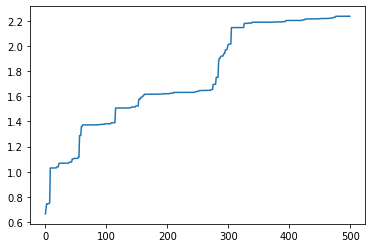

In [3]:

if __name__ == '__main__':

    population_size = 400  # 种群数量
    max_value = 10  # 最大值
    chromosome_length = 20  # 染色体长度
    pc = 0.6  # 交叉概率
    pm = 0.013  # 变异概率
    ga = GA(population_size, chromosome_length, max_value, pc, pm)#实例化GA类
    ga.main()#调用main方法
